In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
dataset = pd.read_csv('data.csv')

In [21]:
dataset.head()

,palavra,erro_gramatica,erro_truncamento,erro_espelhamento,erro_acentuacao,correta
0,conseguiu,0,0,0,0,1
1,conseigiu,1,0,0,0,0
2,conseguiu,0,0,0,0,1
3,concegiu,1,0,0,0,0
4,conceguiu,1,0,0,0,0


In [22]:
dataset.set_index("palavra", inplace=True)

In [23]:
dataset.head()

,erro_gramatica,erro_truncamento,erro_espelhamento,erro_acentuacao,correta
palavra,,,,,
conseguiu,0,0,0,0,1
conseigiu,1,0,0,0,0
conseguiu,0,0,0,0,1
concegiu,1,0,0,0,0
conceguiu,1,0,0,0,0


In [28]:
dataset.isnull().sum().sort_values(ascending=False)

erro_gramatica       0
erro_truncamento     0
erro_espelhamento    0
erro_acentuacao      0
correta              0
dtype: int64

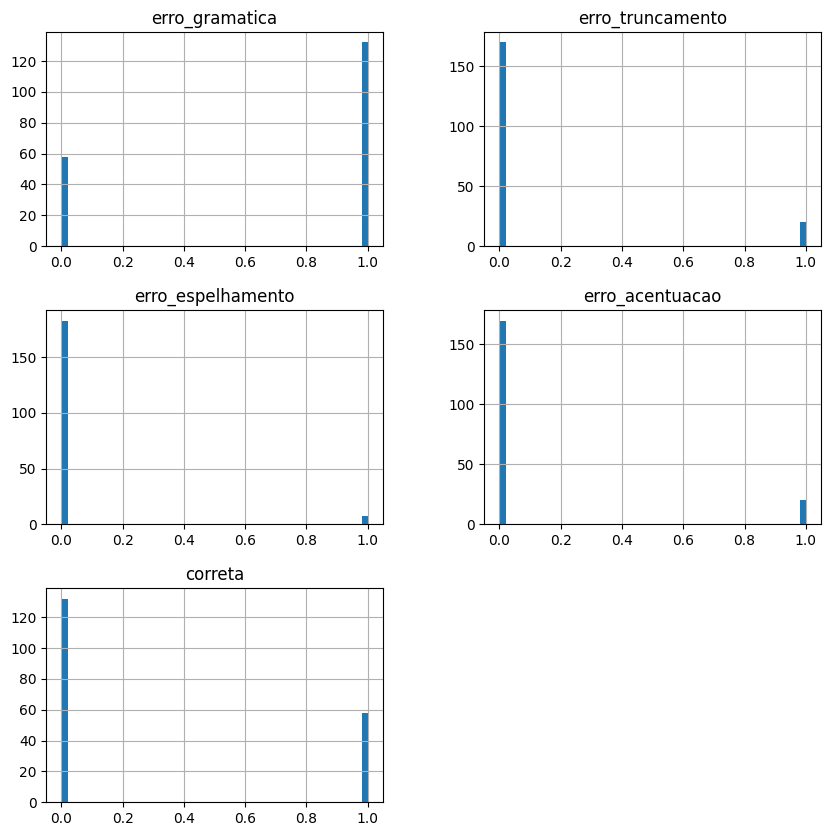

In [29]:
dataset.hist(figsize=(10, 10), bins=50)
plt.show()

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(dataset)

In [26]:
plt.scatter(dataset[y_km == 0, 0], dataset[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolors='black', label = 'cluster 1')
plt.scatter(dataset[y_km == 1, 0], dataset[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolors='black', label = 'cluster 2')
plt.scatter(dataset[y_km == 2, 0], dataset[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolors='black', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 250, c = 'red', marker = '*', edgecolors='black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

InvalidIndexError: (array([False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False]), 0)

In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 23.46


/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) 

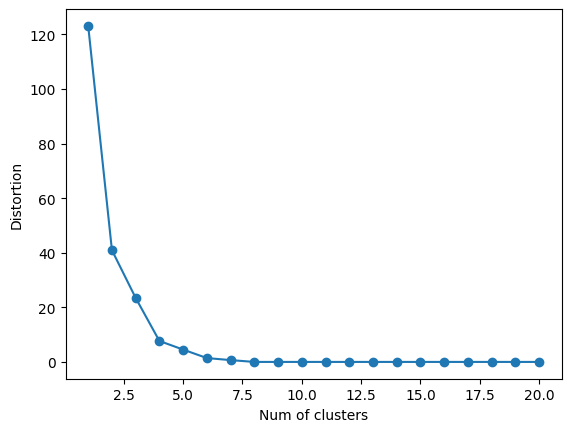

In [9]:
distortions = []
for i in range(1,21):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1,21), distortions, marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Distortion')
plt.show()

In [27]:
km = KMeans(n_clusters = 10, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

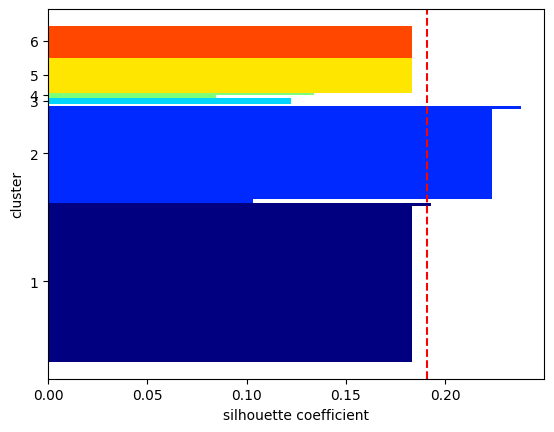

In [21]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')


y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhouette coefficient')
plt.show()
